# 机器学习算法理论及实战（一）——KNN算法

## 一、介绍
K最近邻（KNN）算法是一种监督的ML算法，可用于分类以及回归预测问题。但是，它主要用于行业中的分类预测问题。以下两个属性将很好地定义KNN：
+ 惰性学习算法：因为它没有专门的训练阶段，并且在分类时将所有数据用于训练。
+ 非参数学习算法 ：因为它不假设有关基础数据的任何信息。

## 二、工作流程
K最近邻（KNN）算法使用“特征相似性”来预测新数据点的值，这意味着，将根据新数据点与训练集中的点的匹配程度为该新数据点分配一个值。我们可以通过以下步骤了解其工作方式：

1. 步骤1：加载训练以及测试数据。
2. 步骤2：选择K的值，即最近的数据点（K可以是任何整数）。
3. 步骤3：对于测试数据中的每个点，请执行以下操作：  

    借助以下任意一种方法来计算测试数据与训练数据的每一行之间的距离：欧几里得距离，曼哈顿距离或汉明距离。
    + 最常用的距离计算方法是欧几里得。
    + 基于距离值，将它们按升序排序。
    + 然后它将从排序后的数组中选择前K行。
    + 现在，它将基于这些行中最多出现的类别为测试点分配这一个类。

4. 步骤4：结束。

## 三、示例
以下是了解K的概念和KNN算法的工作的示例。

假设我们有一个可以绘制如下的数据集。如下：

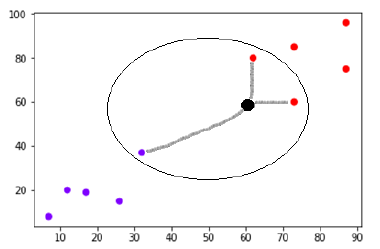

现在，我们需要将带有黑点（在点60,60处）的新数据点分类为蓝色或红色类。我们假设K = 3，即它将找到三个最近的数据点。如图所示：

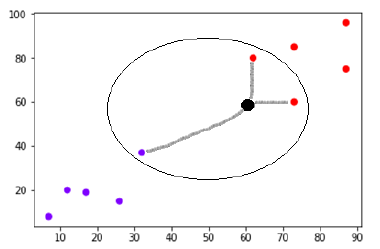

我们可以在上图中看到带有黑点的数据点的三个最近邻居。在这三个中，有两个属于红色等级，因此黑点也将被分配为红色等级。

## 四、用Python实现
### 1.模拟数据及绘图

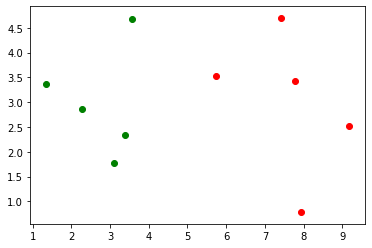

In [3]:
# 导入相应的包
import numpy as np
import matplotlib.pyplot as plt
 
# 模拟数据
raw_data_X = [[3.39, 2.33],
              [3.11, 1.78],
              [1.34, 3.36],
              [3.58, 4.67],
              [2.28, 2.86],
              [7.42, 4.69],
              [5.74, 3.53],
              [9.17, 2.51],
              [7.79, 3.42],
              [7.93, 0.79]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
 
# 绘制散点图
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.show()

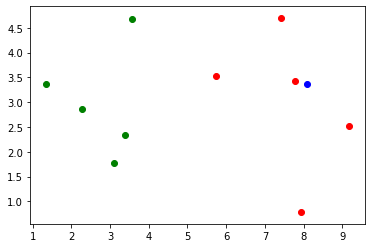

In [4]:
# 加入一个新数据点
X = np.array([8.09, 3.36])

# 绘制增加新数据点的散点图
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], color='g')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], color='r')
plt.scatter(X[0], X[1], color='b')
plt.show()

### 2.KNN过程
①计算距离

In [5]:
# 其他数据分别与新数据点之间的距离
from math import sqrt
 
# 方法一
distance = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - X)**2))
    distance.append(d)
distance

[4.811538215581374,
 5.224633958470201,
 6.75,
 4.696402878799901,
 5.831474942070831,
 1.489227987918573,
 2.356140912594151,
 1.3743725841270265,
 0.30594117081556693,
 2.574975728040946]

In [6]:
# 方法二
distance = [sqrt(np.sum((x_train - X)**2)) for x_train in X_train]

②基于距离值，将它们按升序排序

In [7]:
# 升序排序（按下标排序）
nearest = np.argsort(distance)
nearest

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

③将从排序后的数组中选择前K行

In [9]:
# 设k为6
k = 6
 
# 从排序后的数组中显示前k行对应的类型
topK_y = [y_train[i] for i in nearest[:k]]

topK_y

[1, 1, 1, 1, 1, 0]

④基于这些行中最多出现的类别为测试点分配这一个类

In [10]:
# 导入统计数据包
from collections import Counter
 
# 显示各类对应的数量
votes = Counter(topK_y)
votes

Counter({1: 5, 0: 1})

可知1出现的次数最多为5。,该新增数据点的类型为1，红色。

In [12]:
votes.most_common(2)         # 显示为[(1, 5), (0, 1)]
votes.most_common(1)         # 显示为[(1, 5)]
votes.most_common(1)[0][0]   # 显示为1

1

In [13]:
# 预测数据
predict_y = votes.most_common(1)[0][0]
predict_y

1

### 3.使用scikit-learn中的KNN

In [14]:
# 导包
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
 
# 设置k为6
kNN_classifier = KNeighborsClassifier(n_neighbors = 6)
 
# 训练
raw_data_X = [[3.39, 2.33],
              [3.11, 1.78],
              [1.34, 3.36],
              [3.58, 4.67],
              [2.28, 2.86],
              [7.42, 4.69],
              [5.74, 3.53],
              [9.17, 2.51],
              [7.79, 3.42],
              [7.93, 0.79]]
raw_data_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)
kNN_classifier.fit(X_train, y_train)
 
# 新数据
X = np.array([8.09, 3.36])
X_predict = X.reshape(1, -1) 
 
# 预测数据
y_predict = kNN_classifier.predict(X_predict)
y_predict[0]

1

# 五、KNN的优缺点
## 1.优点
+ 一种非常简单的算法，易于理解和解释。

+ 对于非线性数据非常有用，因为此算法中没有关于数据的假设。

+ 一种通用算法，因为我们可以将其用于分类和回归。

+ 它具有相对较高的准确性，但是有比KNN更好的监督学习模型。

## 2.缺点
+ 这是一种计算上有点昂贵的算法，因为它存储了所有训练数据。

+ 与其他监督学习算法相比，需要高存储容量。

+ 大N时预测很慢。

+ 它对数据规模以及不相关的功能非常敏感。

## 六、KNN的应用
以下是可以成功应用KNN的一些领域：

### 1.银行系统
KNN可以在银行系统中用于预测个人适合贷款审批的天气吗？该个人是否具有与违约者相似的特征？

### 2.计算信用等级
通过与具有相似特征的人进行比较，可以使用KNN算法查找个人的信用等级。

### 3.政治
借助KNN算法，我们可以将潜在选民分为多个类别，例如“将投票”，“将不投票”，“将对党的代表大会投票”，“将对党的代表投票”。

### 4.其他领域
语音识别，手写检测，图像识别和视频识别。